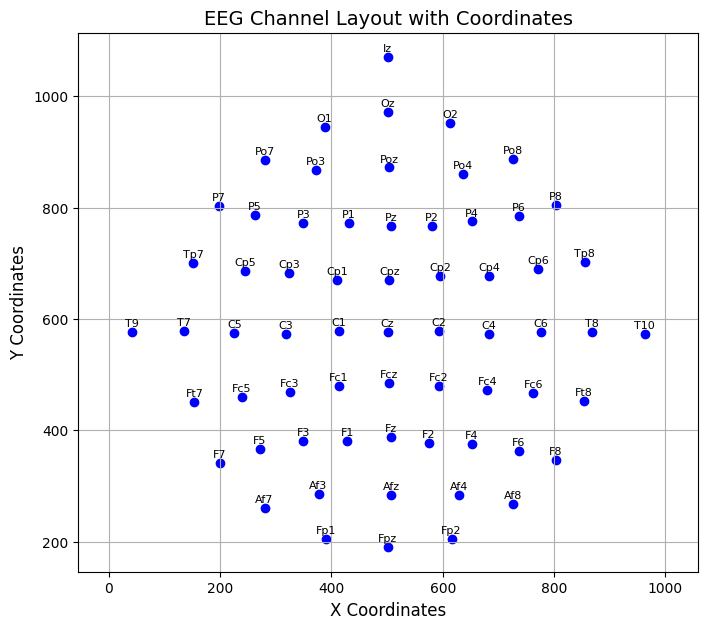

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load coordinates and channel names from CSV files
coordinates_file = "../data/coordinates.csv"
channels_file = "../data/channels.csv"

coordinates = pd.read_csv(coordinates_file, header=None, names=["x", "y"])
channels = pd.read_csv(channels_file, header=None, names=["channel"])

# Ensure coordinates and channels align
if len(coordinates) != len(channels):
    raise ValueError("The number of coordinates does not match the number of channels.")

# Plot the coordinates
plt.figure(figsize=(8, 7))
plt.scatter(coordinates["x"], coordinates["y"], color="blue", marker="o")

# Annotate each point with its channel name
for (x, y), channel in zip(coordinates.values, channels["channel"]):
    plt.text(x, y + 10, channel, fontsize=8, ha="center")

# Set plot labels and title
plt.title("EEG Channel Layout with Coordinates", fontsize=14)
plt.xlabel("X Coordinates", fontsize=12)
plt.ylabel("Y Coordinates", fontsize=12)
plt.grid(True)
plt.axis("equal")

# Show the plot
plt.show()

